# 2. Checking the data we loaded

Given that Github has a limited capacity to upload data, please request the dataset to David Naranjo (d.f.naranjohernandez@tudelft.nl).
Then, change the path2datadir variable to the location of this folder in your computer.

In [144]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.patheffects as pe
import numpy as np
import time
import sys

# Importing the main code.
module_path = os.path.abspath(os.path.join('../src/ocloc'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ocloc import ProcessingParameters, ClockDrift, trim_correlation_trace

In [145]:
# Parameters for locating the files where the correlation files and station 
# information is contained.
path2data_dir = "/Users/localadmin/Dropbox/GitHub/data"
# path2data_dir = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/correlations_O20"
station_file = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/station_info"
reference_time = '2014-08-21T00:00:00.000000Z'

params = ProcessingParameters(
                 freqmin = 0.2, # Low freq. for the bandpass filter
                 freqmax = 0.4, # High freq. for the bandpass filter 
                 ref_vel = 4500, # m/s
                 dist_trh = 2.5, # Minimum station separation in terms of wavelength
                 snr_trh = 30, # Signal-to-noise ratio threshold
                 noise_st = 240, # start of the noise window.
                 dt_err = 0.004, # Sampling interval needs to be multiple of this value.
                 resp_details = False)

cd = ClockDrift(station_file, path2data_dir, 
                  reference_time = '2014-08-21T00:00:00.000000Z',
                  list_of_processing_parameters=[params])

# If you want to store the object you can do so by uncommenting the following lines:
#import pickle 
#filehandler = open("ClockDrift.obj", 'wb') 
#pickle.dump(cd, filehandler)

No correlation file found for station:O26
No correlation file found for station:#STK


In [146]:
cd.get_correlations_of_stationpair("O14", "O19")

[
  Correlation object
  Station 1: O14
  Station 2: O19
  Average date of CC: 2014-10-17T12:31:59.000000Z
  Number of days: 100.0
  Interstation distance in km: 10.666950454788724
  Path: /Users/localadmin/Dropbox/GitHub/data/O14_O19_1413549119_100.sac
  t_app: Not calculated yet.,
 
  Correlation object
  Station 1: O14
  Station 2: O19
  Average date of CC: 2014-12-06T12:31:59.000000Z
  Number of days: 100.0
  Interstation distance in km: 10.666950454788724
  Path: /Users/localadmin/Dropbox/GitHub/data/O14_O19_1417869119_100.sac
  t_app: Not calculated yet.,
 
  Correlation object
  Station 1: O14
  Station 2: O19
  Average date of CC: 2015-01-25T12:31:59.000000Z
  Number of days: 100.0
  Interstation distance in km: 10.666950454788724
  Path: /Users/localadmin/Dropbox/GitHub/data/O14_O19_1422189119_100.sac
  t_app: Not calculated yet.,
 
  Correlation object
  Station 1: O14
  Station 2: O19
  Average date of CC: 2015-03-16T12:31:59.000000Z
  Number of days: 100.0
  Interstation di

Now let's just take as an example the cross-correlations between HAH and O20

In [147]:
station1 = cd.get_station("HAH")
station2 = cd.get_station("O20")

It is possible to check all the information of the stations as:

In [148]:
station2


 Station object
 Code: O20
 Index: 13
 Project: IMAGE
 Sensor type: PZ_OBS
 Needs correction: True
 Latitude: 63.68719
 Longitude: -23.31253
 Elevation: -109.0
 a values: []
 b values: []

Now let's plot the location of both stations to get an overview. For this you will need to have Cartopy installed on your computer.

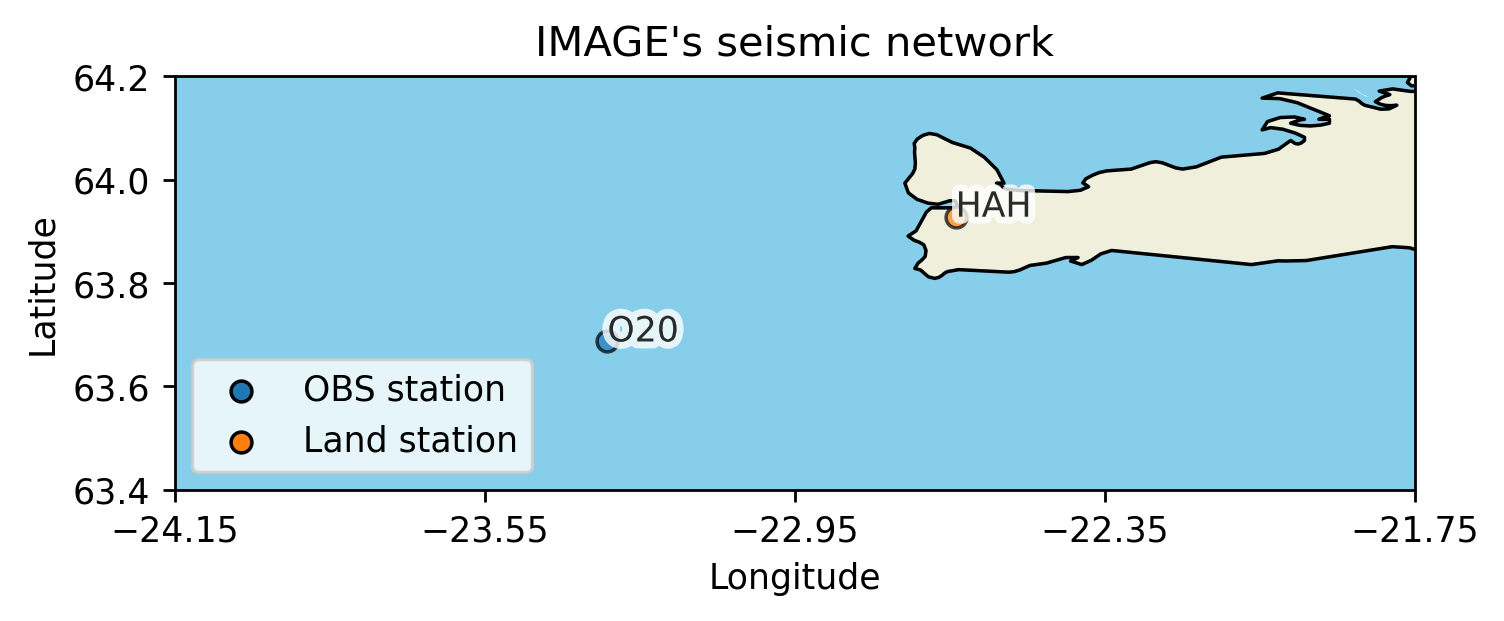

In [149]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

fig = plt.figure(dpi=250)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-24.15, -21.75, 63.4, 64.2])
for station in [station1, station2]:
    plt.annotate(station.code, (station.longitude, station.latitude),
                    zorder=9999, alpha=0.8, path_effects=[pe.withStroke(linewidth=4,
                    foreground="white")])

    x, y = station.longitude, station.latitude
    color = 'C0' if station.needs_correction else 'C1'
    ax.scatter(x, y, c=color, zorder=999,
            edgecolor='k', alpha=0.7, transform=ccrs.PlateCarree())

ax.scatter([],[], label='OBS station', color='C0', edgecolor='k', transform=ccrs.PlateCarree())
ax.scatter([],[], label='Land station', color='C1', edgecolor='k', transform=ccrs.PlateCarree())
plt.legend(loc=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("IMAGE's seismic network")
n_ticks = 5

plt.xticks(np.linspace(llcrnrlon, urcrnrlon, n_ticks))
plt.yticks(np.linspace(llcrnrlat, urcrnrlat, n_ticks))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, color='skyblue')

plt.show()

## 2.1 Checking the cross-correlations of a given station pair
We can check the individual cross-correlations of the station pair using the function`get_correlations_of_stationpair()`. This function returns a list of all correlations for a given station pair.

In [150]:
correlations = cd.get_correlations_of_stationpair(station1.code,
                                                 station2.code)
correlations[0]


 Correlation object
 Station 1: HAH
 Station 2: O20
 Average date of CC: 2014-10-17T11:50:32.000000Z
 Number of days: 100.0
 Interstation distance in km: 42.73868578068813
 Path: /Users/localadmin/Dropbox/GitHub/data/HAH_O20_1413546632_100.sac
 t_app: Not calculated yet.

The `Correlation` objects contain all the metadata of the cross-correlation files.
If you want to check the different attributes you just need to do type a `Correlation.` and the attribute you want to access. You can check all the attributes of the object as:

In [151]:
from pprint import pprint

correlation1 = correlations[0]
print("Path to the directory of correlation is ")
pprint(vars(correlation1))

Path to the directory of correlation is 
{'apriori_dt1': 'Not calculated yet.',
 'apriori_dt2': 'Not calculated yet.',
 'average_date': UTCDateTime(2014, 10, 17, 11, 50, 32),
 'cpl_dist': 42738.68578068813,
 'delta': 0.03999999910593033,
 'dt_ins_station1': 'Not calculated yet.',
 'dt_ins_station2': 'Not calculated yet.',
 'file_path': '/Users/localadmin/Dropbox/GitHub/data/HAH_O20_1413546632_100.sac',
 'length_of_file_s': 3599.96,
 'npts': 90000,
 'number_days': 100.0,
 'processing_parameters': Processing Parameters Object:
Minimum frequency: 0.2
Maximum frequency: 0.4
Reference surface wave velocity: 4500.0
Minimum station separation in terms of wavelength: 2.5
Signal-to-noise ratio threshold: 30.0
Start of the noise window: 240,
 'sampling_rate': 25.0,
 'station1_code': 'HAH',
 'station2_code': 'O20',
 't_N_lps': 57.493425925925926,
 't_app': 'Not calculated yet.'}


We can get an overview of the cross-correlations of the station pair as follows:

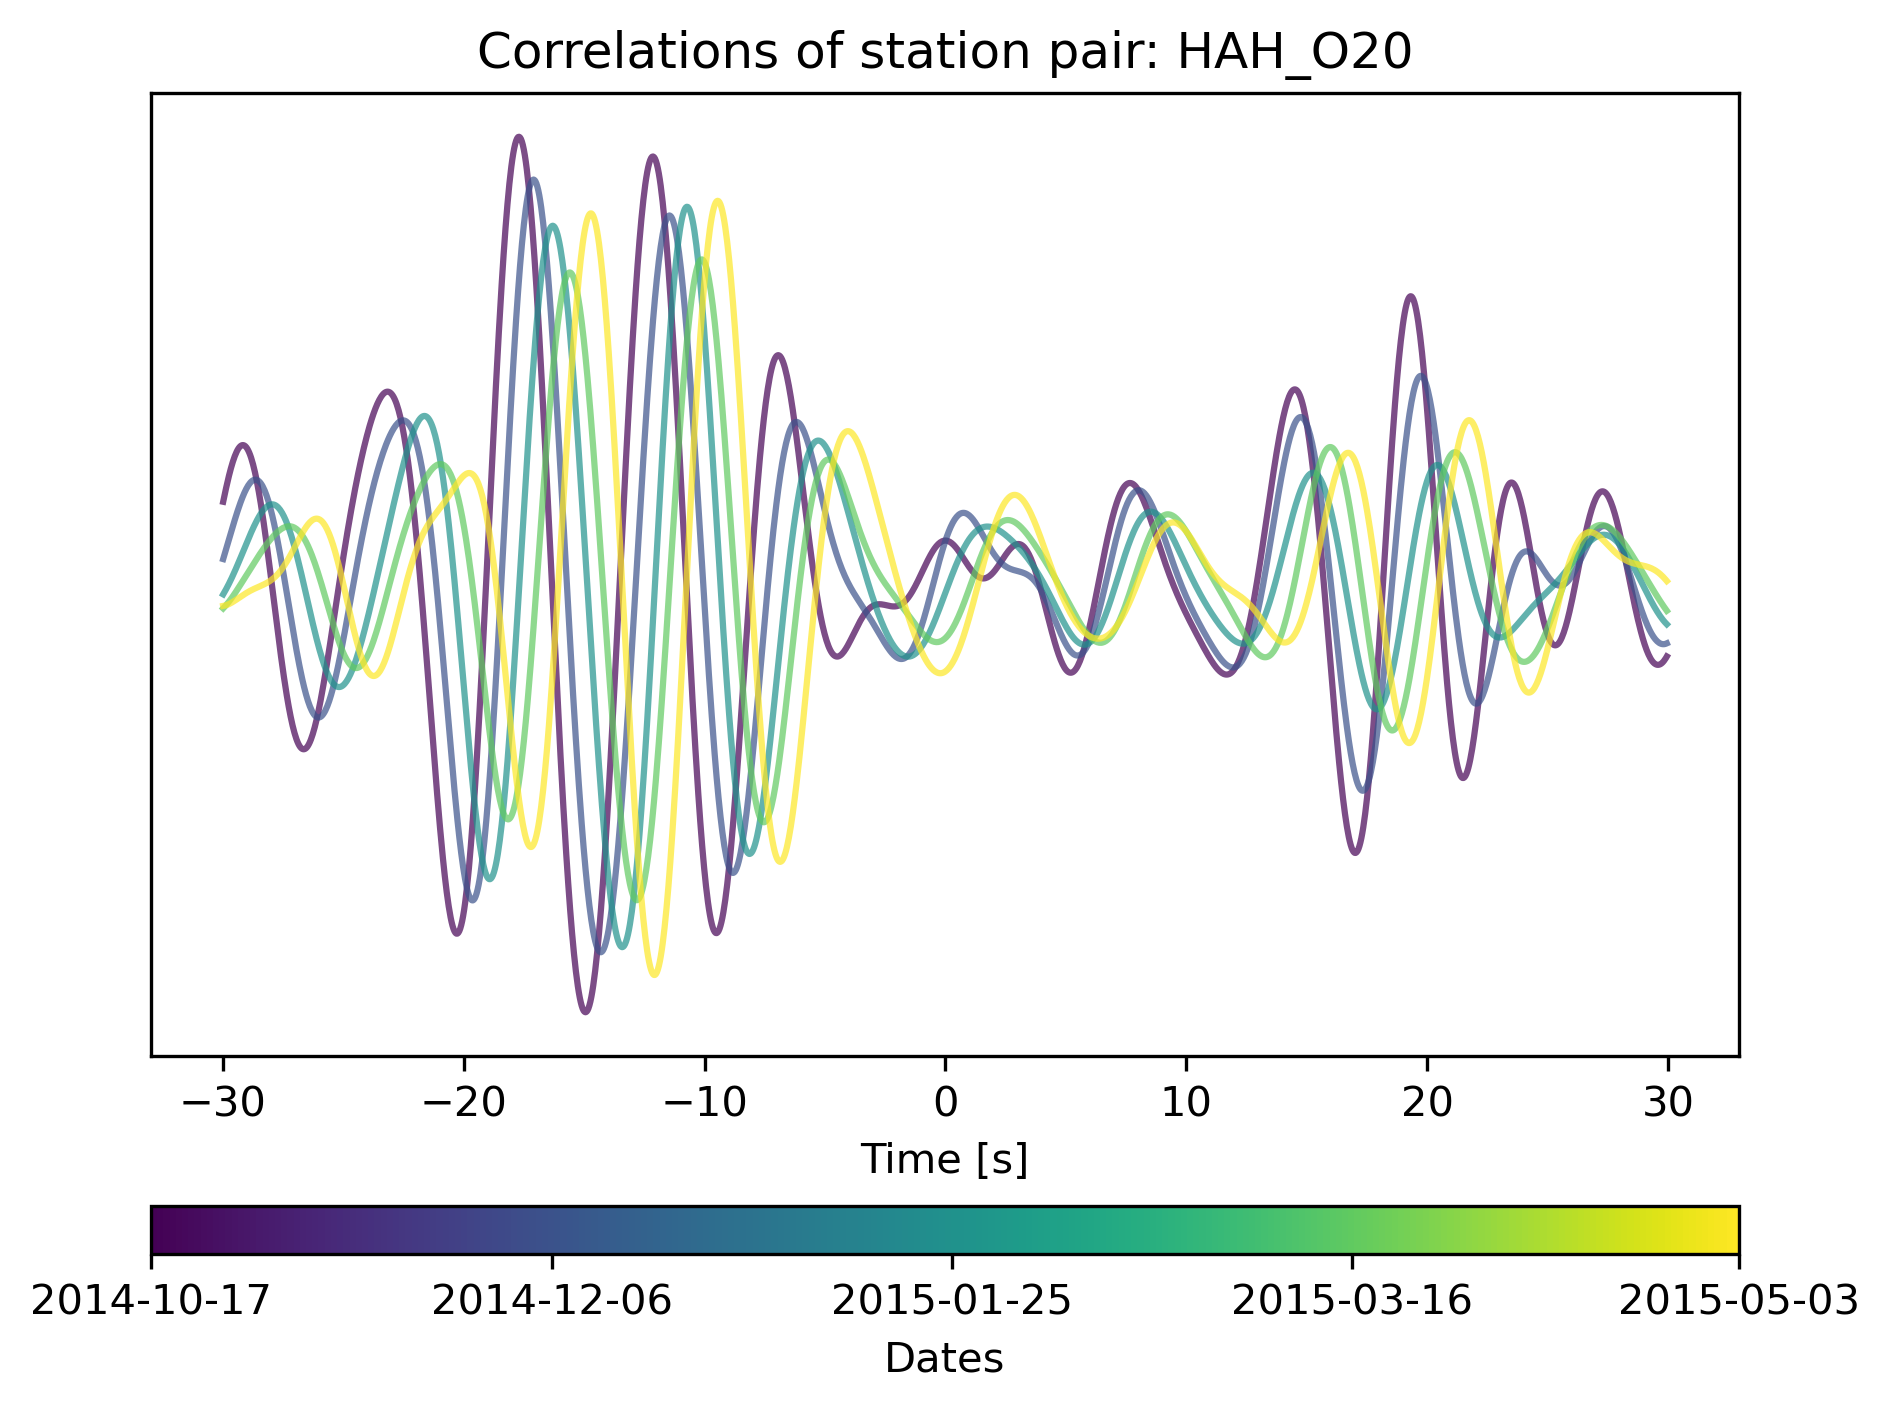

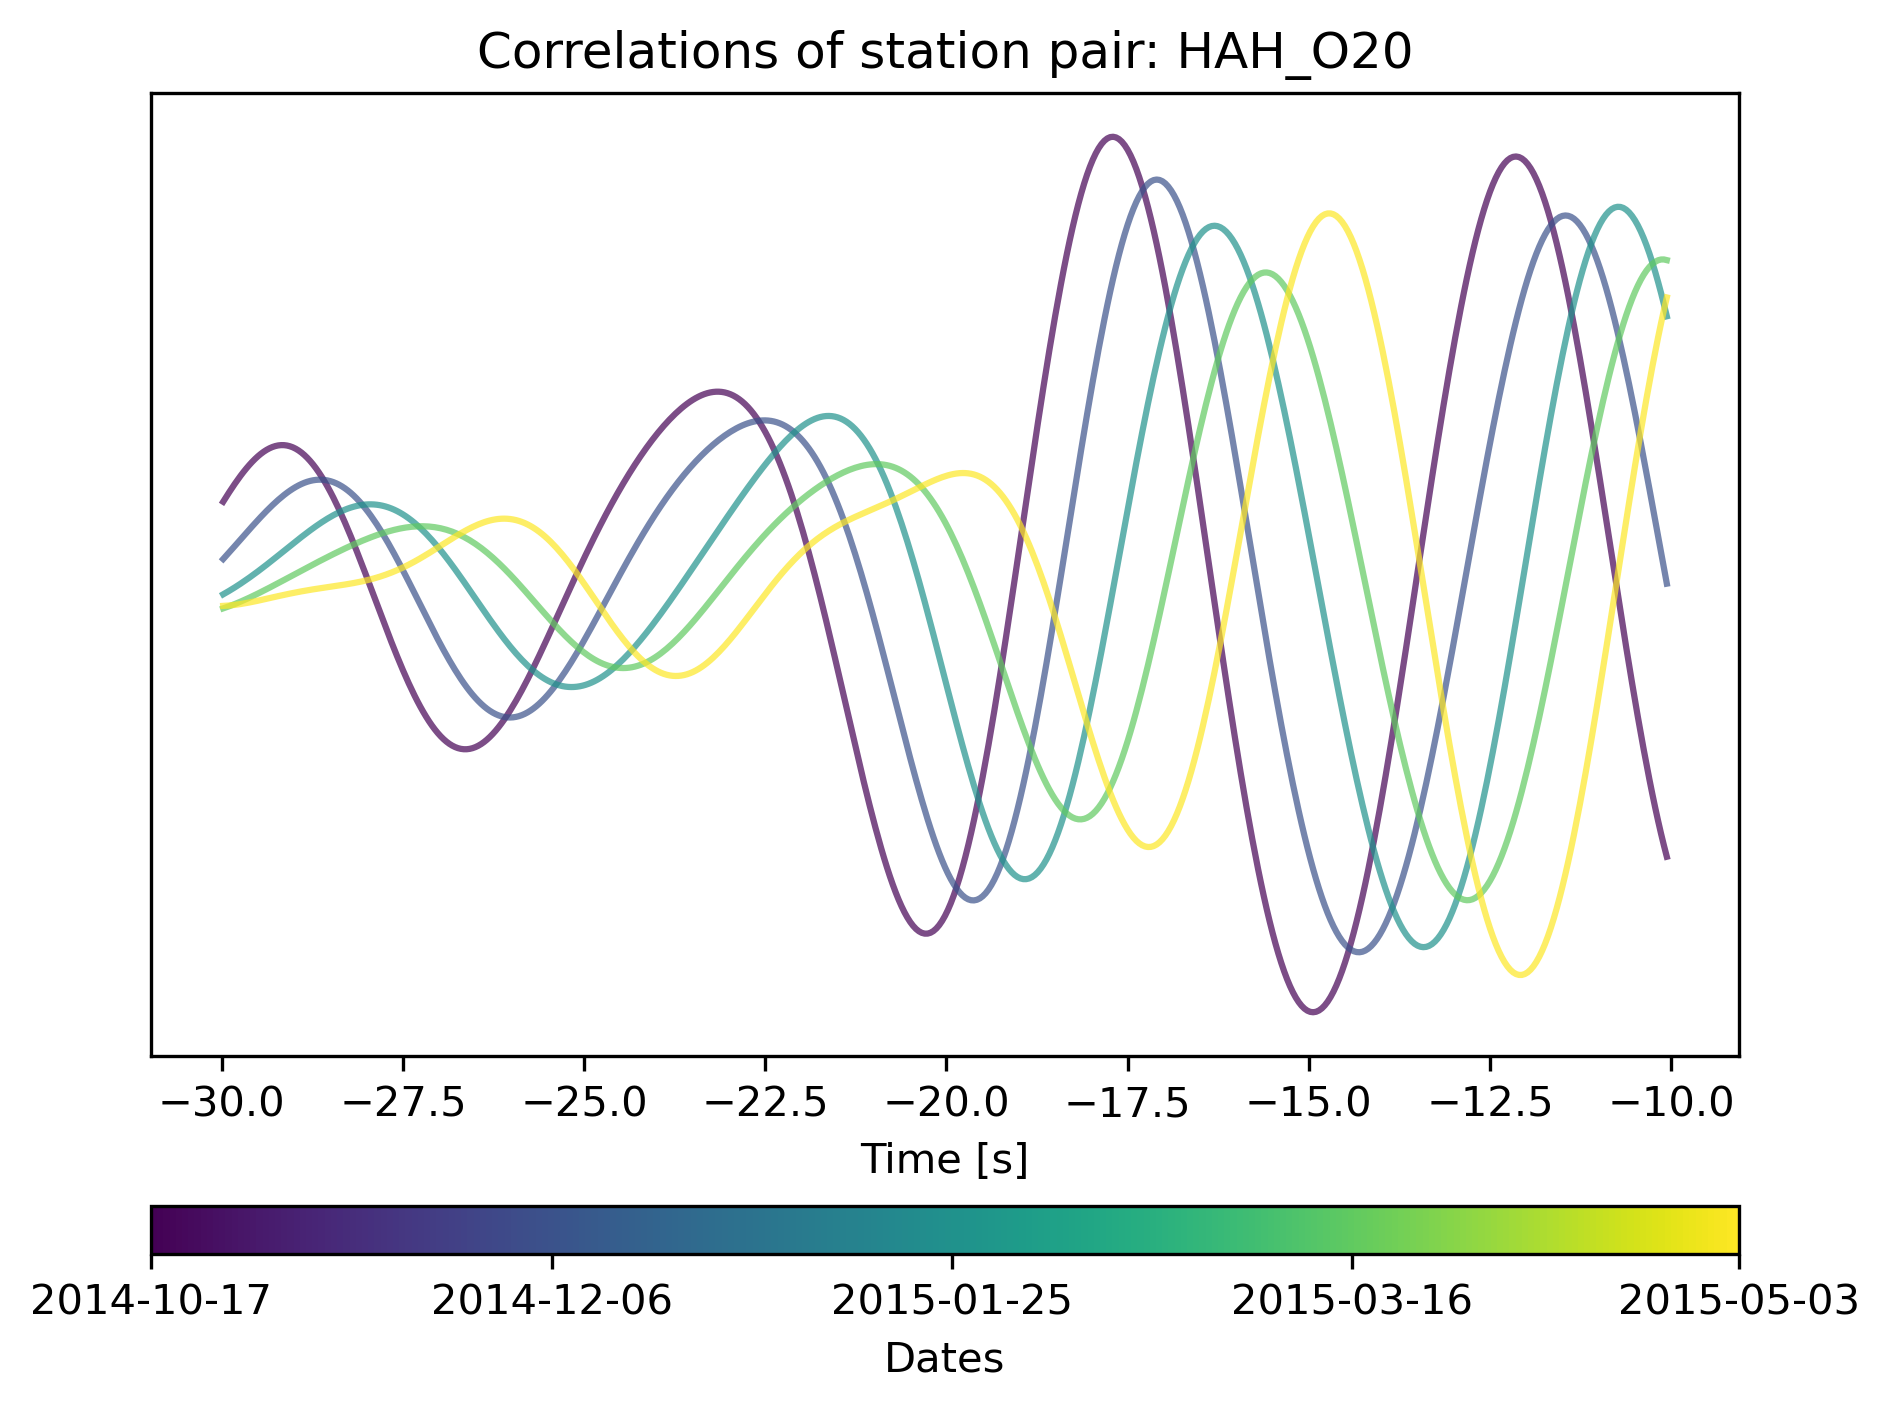

In [163]:
cd.processing_parameters[0].freqmin=0.15
cd.processing_parameters[0].freqmax=0.3
cd.plot_correlations_of_stationpair(station1.code, station2.code,
                                    min_t=-30, max_t=30)
cd.plot_correlations_of_stationpair(station1.code, station2.code,
                                    min_t=-30, max_t=-10)

If we zoom in we can actually see how the interferometric responses are being shifted over time.

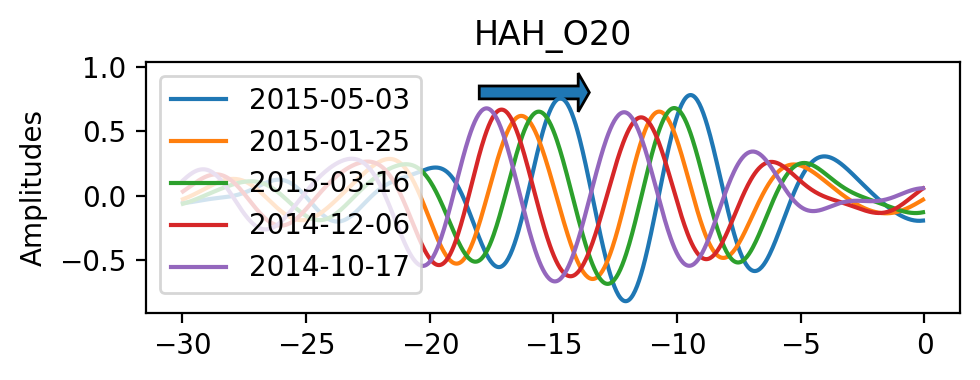

In [154]:
from ocloc import read_xcorrelations
st, _ = read_xcorrelations(station1.code, station2.code, path2data_dir)
st = st.normalize()
min_t=-30
max_t=0
freqmin=0.15
freqmax=0.3

fig, (ax1) = plt.subplots(1, 1, figsize=(5, 2), dpi=200)
for tr in st:
    # Trim the signal to use only the part we are interested at.
    t1, data = trim_correlation_trace(tr, min_t, max_t, freqmin, freqmax)

    # index of matching element
    acausal_indixes = [idx for idx, val in enumerate(t1) if val > -22 and val < -10]
    causal_indixes = [idx for idx, val in enumerate(t1) if val > 12 and val < 25]
    ax1.plot(t1, data, label=str(tr.stats.average_date)[:10])


# Adding an arrow to graph starting 
# from the base (2, 4) and with the 
# length of 2 units from both x and y
# And setting the width of arrow for
# better visualization
plt.arrow(-18, 0.8, 4, 0, width = 0.1)

ax1.set_title(tr.stats.station_pair)
ax1.set_ylabel('Amplitudes')
ax1.legend(loc=2)
plt.tight_layout()